<a href="https://colab.research.google.com/github/usugunawan15/Tubes-DTI/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')


In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/usugunawan15/Tubes-DTI/main/dataset_donor_darah.csv', sep = ';')
print('Shape of dataframe:', df.shape)
df

Shape of dataframe: (25820, 6)


,ID,Nama,Umur,Gol (Rh),JK,Frekuensi
0,6171DGRUD000091,Rudi Wardani,48,A+,Pria,4
1,6171DGMUH000223,Muhammad Isya Maulana,41,O+,Pria,3
2,6171M1RUS000015,Rustandi,35,O+,Pria,10
3,6171DGSAR000059,Sarzuni,44,B+,Pria,3
4,6171DGSYI000009,Syihab Ahmad,30,AB+,Pria,20
...,...,...,...,...,...,...
25815,6171DGARM000012,Armen,43,A+,Pria,2
25816,6171DGAPR000026,Apriyadi Riyanto,38,B+,Pria,5
25817,6171M2EMI000010,EMI SAFITRI,36,O+,Wanita,2
25818,6171M3RID000005,RIDWAN,36,A+,Pria,1


In [123]:
df['Gol (Rh)'].value_counts()

O+     10122
B+      7419
A+      6319
AB+     1934
B-        10
A-         7
O-         7
AB-        2
Name: Gol (Rh), dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25820 entries, 0 to 25819
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         25820 non-null  object
 1   Nama       25813 non-null  object
 2   Umur       25820 non-null  int64 
 3   Gol (Rh)   25820 non-null  object
 4   JK         25820 non-null  object
 5   Frekuensi  25820 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [125]:
df.isnull().sum()

ID           0
Nama         7
Umur         0
Gol (Rh)     0
JK           0
Frekuensi    0
dtype: int64

In [126]:
df.drop(['ID'], axis=1, inplace=True)

In [127]:
df

,Nama,Umur,Gol (Rh),JK,Frekuensi
0,Rudi Wardani,48,A+,Pria,4
1,Muhammad Isya Maulana,41,O+,Pria,3
2,Rustandi,35,O+,Pria,10
3,Sarzuni,44,B+,Pria,3
4,Syihab Ahmad,30,AB+,Pria,20
...,...,...,...,...,...
25815,Armen,43,A+,Pria,2
25816,Apriyadi Riyanto,38,B+,Pria,5
25817,EMI SAFITRI,36,O+,Wanita,2
25818,RIDWAN,36,A+,Pria,1


In [128]:
df.drop(['Nama'], axis=1, inplace=True)

In [129]:
df

,Umur,Gol (Rh),JK,Frekuensi
0,48,A+,Pria,4
1,41,O+,Pria,3
2,35,O+,Pria,10
3,44,B+,Pria,3
4,30,AB+,Pria,20
...,...,...,...,...
25815,43,A+,Pria,2
25816,38,B+,Pria,5
25817,36,O+,Wanita,2
25818,36,A+,Pria,1


In [130]:
df['JK'] = df['JK'].map({'Pria':1, 'Wanita':0})
df['Gol (Rh)'] = df['Gol (Rh)'].map({'A+':0, 'A-':1, 'B+':2, 'B-':3, 'O+':4,'O-':5, 'AB+':6, 'AB-':7})

In [131]:
df

,Umur,Gol (Rh),JK,Frekuensi
0,48,0,1,4
1,41,4,1,3
2,35,4,1,10
3,44,2,1,3
4,30,6,1,20
...,...,...,...,...
25815,43,0,1,2
25816,38,2,1,5
25817,36,4,0,2
25818,36,0,1,1


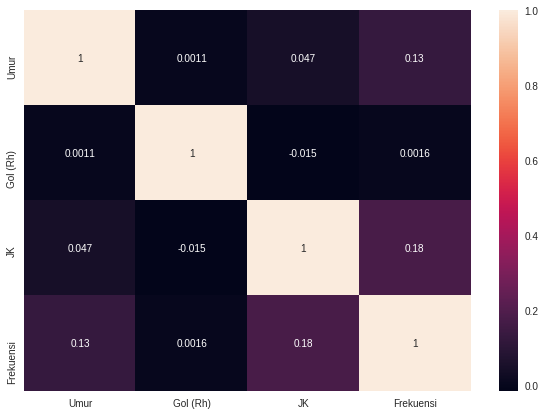

In [132]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [133]:
df.corr()

,Umur,Gol (Rh),JK,Frekuensi
Umur,1.000000,0.001139,0.046923,0.131481
Gol (Rh),0.001139,1.000000,-0.015111,0.001578
JK,0.046923,-0.015111,1.000000,0.179141
Frekuensi,0.131481,0.001578,0.179141,1.000000


In [134]:
x = df.drop(["JK"], axis = 1)
x

,Umur,Gol (Rh),Frekuensi
0,48,0,4
1,41,4,3
2,35,4,10
3,44,2,3
4,30,6,20
...,...,...,...
25815,43,0,2
25816,38,2,5
25817,36,4,2
25818,36,0,1


In [135]:
y = df["JK"]
y

0        1
1        1
2        1
3        1
4        1
        ..
25815    1
25816    1
25817    0
25818    1
25819    1
Name: JK, Length: 25820, dtype: int64

**Training**

In [136]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(x , y, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18074, 3)
(7746, 3)
(18074,)
(7746,)


In [139]:
# Import Module
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [140]:
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[   1, 1445],
       [   3, 6297]])

In [141]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.8130648076426543
Precision: 0.8133557220356497
Recall: 0.9995238095238095
F1 Score: 0.8968807862127901
Cohens Kappa Score: 0.0003497285058677857


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [157]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = knn.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

7746
0.7751097340562871
0.9212698412698412
[[ 200 1246]
 [ 496 5804]]
